In [1]:
#Import libraries required for analysis.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import Book dataset
book = pd.read_csv(r"Books.csv",encoding = 'latin-1',low_memory=False)
user = pd.read_csv(r"Users.csv",encoding = 'latin-1')
rating = pd.read_csv(r"Ratings.csv",encoding = 'latin-1')

In [3]:
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
# Number of rows and columns for all datasets.
print("User dataset - (rows,columns) =",user.shape)
print("Rating dataset - (rows,columns) =",rating.shape)
print("Book dataset - (rows,columns) =",book.shape)

User dataset - (rows,columns) = (278858, 3)
Rating dataset - (rows,columns) = (1149780, 3)
Book dataset - (rows,columns) = (271360, 8)


In [7]:
# Merge ratings dataset with books dataset based on ISBN
merged_data = pd.merge(rating,book, on = 'ISBN')

# Merge merged_data with users dataset based on UserID
merged_data = pd.merge(merged_data,user, on = 'User-ID')

In [8]:
# First five rows of the data set
merged_data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23.0


In [9]:
#Number of rows and columns after merging the all data sets
merged_data.shape

(1031136, 12)

In [10]:
# Data set info
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   ISBN                 1031136 non-null  object 
 2   Book-Rating          1031136 non-null  int64  
 3   Book-Title           1031136 non-null  object 
 4   Book-Author          1031135 non-null  object 
 5   Year-Of-Publication  1031136 non-null  object 
 6   Publisher            1031134 non-null  object 
 7   Image-URL-S          1031136 non-null  object 
 8   Image-URL-M          1031136 non-null  object 
 9   Image-URL-L          1031132 non-null  object 
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


In [11]:
# All features in data set after Merging
merged_data.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L', 'Location', 'Age'],
      dtype='object')

In [12]:
merged_data['Book-Rating'].unique()

array([ 0,  5,  9,  8,  7,  6, 10,  3,  4,  2,  1], dtype=int64)

In [13]:
rating_explicit= merged_data[merged_data['Book-Rating']!=0]

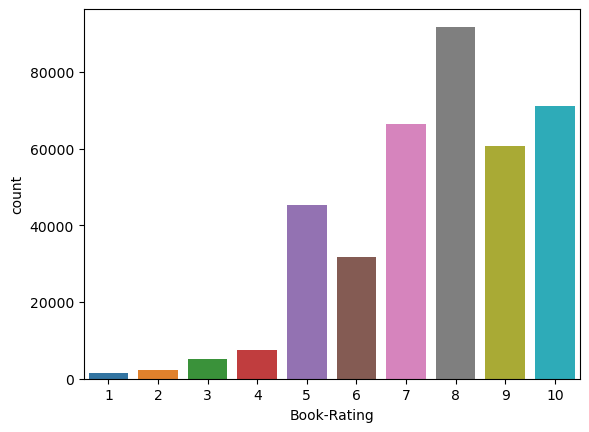

In [14]:
#data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=rating_explicit,x='Book-Rating')
plt.show()

in this countplot book rating indicate that higher rating are common users and rating 8 has been rated as highest no.of times

Text(0.5, 1.0, 'top 20 author with number of books')

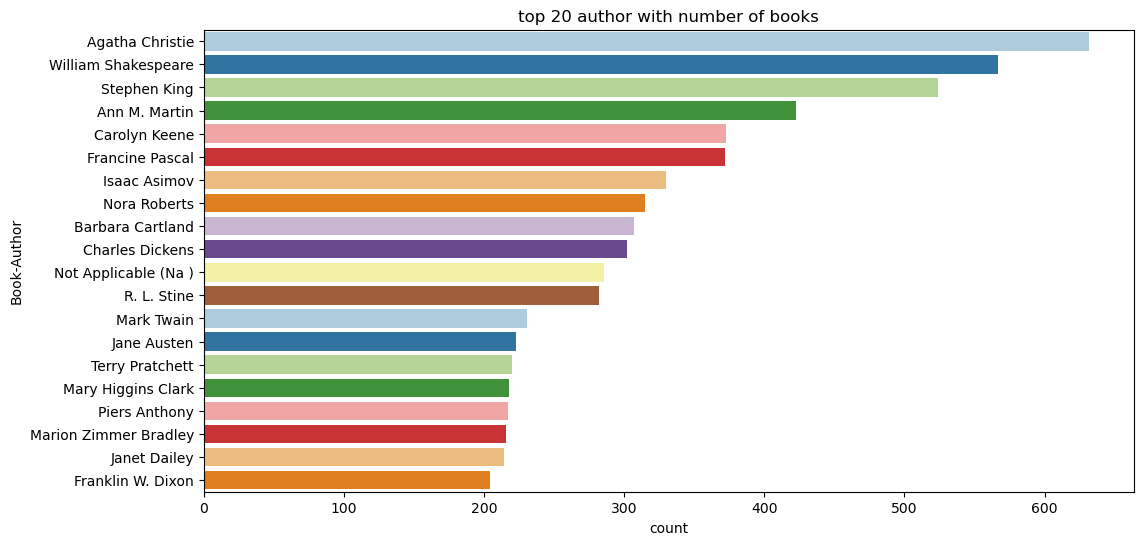

In [15]:
#TOP author with number of Book
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Author",palette='Paired',data=book,order=book['Book-Author'].value_counts().index[0:20])
plt.title("top 20 author with number of books")

Top publisher with published books

Text(0.5, 1.0, 'Top 20 Publishers with number of books Published')

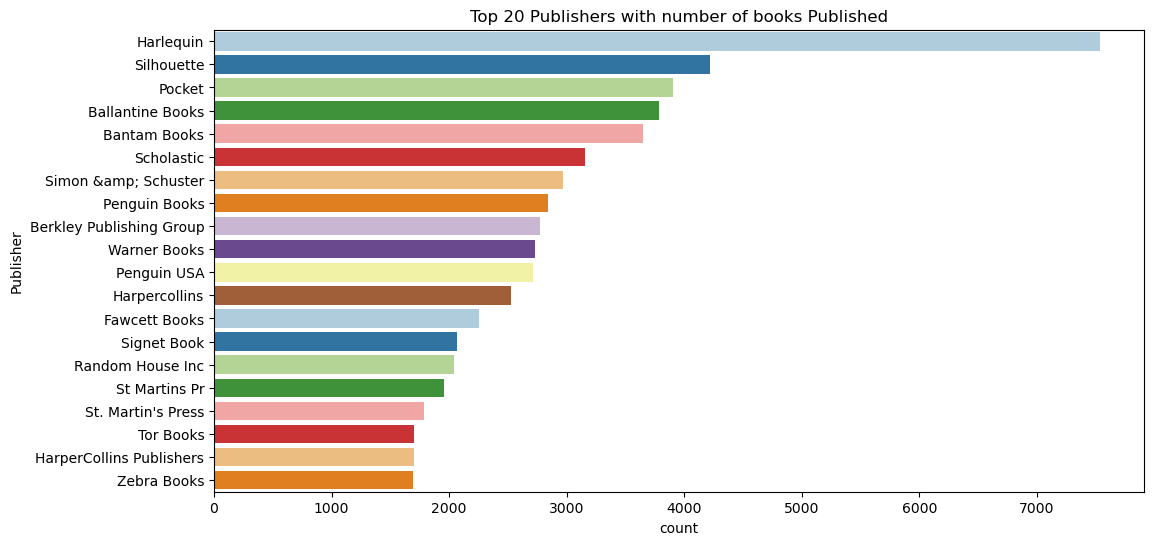

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(y="Publisher",palette='Paired',data=book,order=book['Publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books Published")

In [17]:
#Total number of unique users in dataset
print("Total number of unique users are = ",merged_data['User-ID'].nunique())

#Total number of unique books in dataset
print('Total number of unique books are =', merged_data['Book-Title'].nunique())

#Unique ratings given by Users for different books
print("Unique ratings given by users -", merged_data["Book-Rating"].unique())

Total number of unique users are =  92106
Total number of unique books are = 241071
Unique ratings given by users - [ 0  5  9  8  7  6 10  3  4  2  1]


In [18]:
#number of books read by each users.
print("Number of books read by each user")
merged_data.drop_duplicates(subset =["User-ID","Book-Title"]).groupby("User-ID").count().reset_index()[["User-ID","Book-Title"]].rename(columns = {"Book-Title":"Num_books"}).sort_values(by = "Num_books", ascending = False)

Number of books read by each user


,User-ID,Num_books
3629,11676,10563
65332,198711,6360
32581,98391,5739
50848,153662,5712
11848,35859,5536
...,...,...
39362,119043,1
39363,119045,1
39365,119051,1
39366,119056,1


In [19]:
#Find the null values in the dataset
merged_data.isna().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
Location                    0
Age                    277835
dtype: int64

In [20]:
merged_data[merged_data['Publisher'].isnull()]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
9777,98391,193169656X,9,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,"morrow, georgia, usa",52.0
9786,98391,1931696993,9,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,"morrow, georgia, usa",52.0


We will not remove the rows with missing values other than User-ID, Book-Title and Book-Ratings as we will consider User-ID, Book-Title and Book-Ratings for our Recommendation System Analysis.

# Recommendation based on Popularity

In [21]:
#We will extract the data set with required features 
popular_book_rating = merged_data[['User-ID','Book-Title','Book-Rating']]
popular_book_rating.head()

,User-ID,Book-Title,Book-Rating
0,276725,Flesh Tones: A Novel,0
1,2313,Flesh Tones: A Novel,5
2,2313,Ender's Game (Ender Wiggins Saga (Paperback)),9
3,2313,In Cold Blood (Vintage International),8
4,2313,Divine Secrets of the Ya-Ya Sisterhood : A Novel,9


In [22]:
#Number of rows and columns
popular_book_rating.shape

(1031136, 3)

In [23]:
#Check if any missing values present
popular_book_rating.isnull().sum()

User-ID        0
Book-Title     0
Book-Rating    0
dtype: int64

In [24]:
# Check for duplicated values
popular_book_rating[popular_book_rating.duplicated()].count()

User-ID        3127
Book-Title     3127
Book-Rating    3127
dtype: int64

In [25]:
#Drop duplicate values
popular_book_rating.drop_duplicates(inplace = True)

In [26]:
#Shape of dataset after dropping duplicate rows
popular_book_rating.shape

(1028009, 3)

In [27]:
#Group dataset using Book-Title feature.
group_book_rating = popular_book_rating.groupby('Book-Title').count()['Book-Rating'].reset_index()
group_book_rating

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [28]:
#Renaming the Book-Rating as num_rating
group_book_rating.rename(columns = {'Book-Rating' : 'num_rating'},inplace = True)

In [29]:
# We will sort the Book-Rating values in descending order
sorted_group_book_rating = group_book_rating.sort_values(by = 'num_rating',ascending = False)
sorted_group_book_rating.reset_index()

,index,Book-Title,num_rating
0,234951,Wild Animus,2502
1,196326,The Lovely Bones: A Novel,1295
2,183573,The Da Vinci Code,898
3,5303,A Painted House,824
4,199237,The Nanny Diaries: A Novel,823
...,...,...,...
241066,63634,Faber Book of Beasts,1
241067,147512,Real Animal Heroes: True Stories of Courage De...,1
241068,63635,Faber Book of Golden Fairytales,1
241069,147510,Real American Food: Jane and Michael Stern's C...,1


In [30]:
# We will count average rating given by users for each book
average_rating = popular_book_rating.groupby('Book-Title').mean()['Book-Rating'].reset_index()

#Renaming the Book-Rating with average rating
average_rating.rename(columns = {'Book-Rating':'avg_rating'},inplace = True)

# Sorting avergae rating values in descending order
average_rating.sort_values('avg_rating',ascending = False,inplace = True)

#New dataset after performing the above operations
average_rating.reset_index()

,index,Book-Title,avg_rating
0,102472,"La Tour sombre, tome 1 : Le pistolero",10.0
1,223966,Tyndale's New Testament,10.0
2,115325,Making-Sense-Out-Of-Suffering Therapy,10.0
3,40397,"Cowboy Bebop: Shooting Star, Book 1",10.0
4,224020,"Tyrone's Story (Degrees of Guilt, 3)",10.0
...,...,...,...
241066,159089,Sharing Parenthood After Divorce,0.0
241067,100588,Kristy and the Secret of Susan (Baby-Sitters C...,0.0
241068,159087,Sharing Makes Me Happy,0.0
241069,159086,Sharing Literature With Children,0.0


In [31]:
#Merge the sorted_group_book_rating and the average_rating dataset
popular_book_rating = pd.merge(sorted_group_book_rating,average_rating, on = 'Book-Title')

# Sort avarage rating values in descending order
popular_book_rating.sort_values('avg_rating', ascending = False, inplace = True)

#Dataset after perf
popular_book_rating

,Book-Title,num_rating,avg_rating
120535,"The Lazlo Letters: The Amazing, Real-Life, Act...",1,10.0
185554,On the Farm Front: The Women's Land Army in Wo...,1,10.0
185587,On Writers &amp; Writing,1,10.0
185609,On Tour: The Perfect Girl-What Happens When Yo...,1,10.0
185612,Games Babies Play: From Birth to 12 Months,1,10.0
...,...,...,...
168262,To Grill a Mockingbird: And Other Tasty Titles,1,0.0
168261,To Grow in Spirit,1,0.0
168260,And the Beagles and the Bunnies Shall Lie Down...,1,0.0
168259,To Have &amp; To Hold,1,0.0


From data we can see that there are some users which you read the single book and given the rating to the books. For finding popular books we will select the book with number of ratings more than 300.

In [32]:
# Books with more than or equal to 300 ratings
popular_books = popular_book_rating[popular_book_rating['num_rating']>= 300]

#Sort the data with average rating values in descending order
popular_books.sort_values('avg_rating', ascending = False, inplace = True)

# We will select top 30 books with most ratings to recommend the user(new user)
top_30 = popular_books.head(30)
top_30

,Book-Title,num_rating,avg_rating
59,Harry Potter and the Prisoner of Azkaban (Book 3),425,5.849412
68,Harry Potter and the Goblet of Fire (Book 4),381,5.837270
87,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
24,Harry Potter and the Chamber of Secrets (Book 2),550,5.170909
79,The Fellowship of the Ring (The Lord of the Ri...,360,5.013889
18,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
35,To Kill a Mockingbird,499,4.803607
2,The Da Vinci Code,898,4.642539
56,The Five People You Meet in Heaven,430,4.551163
50,The Catcher in the Rye,449,4.545657


In [33]:
# We will add all other details to the top_popular_books data
top_30_with_book_feature = top_30.merge(book, on = 'Book-Title')

#Shape of data after merging
print(top_30_with_book_feature.shape)

top_30_with_book_feature.head()

(120, 10)


,Book-Title,num_rating,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),425,5.849412,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),425,5.849412,0439136369,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),425,5.849412,0786222743,J. K. Rowling,2000,Thorndike Press,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...
3,Harry Potter and the Goblet of Fire (Book 4),381,5.837270,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
4,Harry Potter and the Goblet of Fire (Book 4),381,5.837270,0439139600,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...


In [34]:
# In above operation we have same book title with different ISBN number so we will drop duplicates
top_30_popular_books = top_30_with_book_feature.drop_duplicates('Book-Title')

#Shape of data set
print(top_30_popular_books.shape)


top_30_popular_books

(30, 10)


,Book-Title,num_rating,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),425,5.849412,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),381,5.837270,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
9,Harry Potter and the Chamber of Secrets (Book 2),550,5.170909,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
12,The Fellowship of the Ring (The Lord of the Ri...,360,5.013889,0345339703,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...
21,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652,059035342X,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
23,To Kill a Mockingbird,499,4.803607,0446310786,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...
31,The Da Vinci Code,898,4.642539,0385504209,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
37,The Five People You Meet in Heaven,430,4.551163,0786868716,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...
39,The Catcher in the Rye,449,4.545657,0316769487,J.D. Salinger,1991,"Little, Brown",http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...


In [35]:
top_30_popular_books.columns

Index(['Book-Title', 'num_rating', 'avg_rating', 'ISBN', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

In [36]:
# From above dataset we will select only required features of book data
top_popular_books = top_30_popular_books[['Book-Title','avg_rating','num_rating','Book-Author','Year-Of-Publication','Publisher','Image-URL-M']]
top_popular_books.reset_index(inplace = True)
top_popular_books.drop(columns ={'index'},inplace = True)

In [37]:
top_popular_books

,Book-Title,avg_rating,num_rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),5.849412,425,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Goblet of Fire (Book 4),5.837270,381,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...
2,Harry Potter and the Order of the Phoenix (Boo...,5.501441,347,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...
3,Harry Potter and the Chamber of Secrets (Book 2),5.170909,550,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...
4,The Fellowship of the Ring (The Lord of the Ri...,5.013889,360,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...
5,Harry Potter and the Sorcerer's Stone (Harry P...,4.895652,575,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...
6,To Kill a Mockingbird,4.803607,499,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...
7,The Da Vinci Code,4.642539,898,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...
8,The Five People You Meet in Heaven,4.551163,430,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...
9,The Catcher in the Rye,4.545657,449,J.D. Salinger,1991,"Little, Brown",http://images.amazon.com/images/P/0316769487.0...


# Collaborative Filtering Based Recommendation System.

# For samilar user we recommend books

For Collaborative Based Recommendation system, we will filter the books and keep only those with over 100 ratings for the analysis and users rated books more than 10.

For this, we group the books by title, count the number of ratings, and keep olny the books with greater than 100 ratings and users rated books more than 10 books.

In [38]:
#Import required libraries for collaborative filtering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [39]:
# We have the dataset with average and number of ratings
BR_more_than_100 = popular_book_rating[popular_book_rating["num_rating"] > 100]

print("Number of books which have ratisngs greater than 100 = ",len(BR_more_than_100["Book-Title"].unique()))

      
print("Shape of BR100-(Rows,Columns)",BR_more_than_100.shape)
BR_more_than_100.head()

Number of books which have ratisngs greater than 100 =  894
Shape of BR100-(Rows,Columns) (894, 3)


,Book-Title,num_rating,avg_rating
59,Harry Potter and the Prisoner of Azkaban (Book 3),425,5.849412
68,Harry Potter and the Goblet of Fire (Book 4),381,5.837270
523,The Little Prince,141,5.815603
140,Harry Potter and the Sorcerer's Stone (Book 1),277,5.722022
87,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441


Let's use a Jointplot to check the correlation between the average rating and the number of ratings.

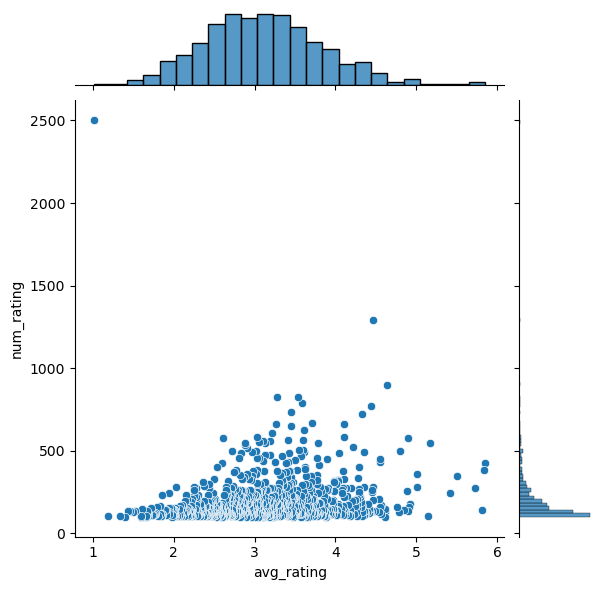

In [40]:
sns.jointplot(x = "avg_rating", y = "num_rating", data = BR_more_than_100)

In [41]:
#Now we will merge the dataset with all features
BR_more_than_100 = pd.merge(book,BR_more_than_100, on = "Book-Title")
BR_MR_100 = pd.merge(rating, BR_more_than_100, on = "ISBN")
BR_MR_100

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,num_rating,avg_rating
0,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,629,3.615262
1,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,629,3.615262
2,638,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,629,3.615262
3,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,629,3.615262
4,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,629,3.615262
...,...,...,...,...,...,...,...,...,...,...,...,...
181777,271503,0394512731,0,The Heart of a Woman,Maya Angelou,1981,Random House Inc,http://images.amazon.com/images/P/0394512731.0...,http://images.amazon.com/images/P/0394512731.0...,http://images.amazon.com/images/P/0394512731.0...,108,3.462963
181778,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,404,4.294554
181779,274808,0449701913,0,Homecoming,Cynthia Voigt,1983,Fawcett Books,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...,133,2.488722
181780,275970,0865714215,0,Stormy Weather,Guy Dauncey,2001,New Society Publishers,http://images.amazon.com/images/P/0865714215.0...,http://images.amazon.com/images/P/0865714215.0...,http://images.amazon.com/images/P/0865714215.0...,101,3.227723


In [42]:
#users rated books more than 10 books.
user_rated_morethan_10 = BR_MR_100.groupby("User-ID").count()["Book-Rating"].reset_index()
user_rated_morethan_10 = user_rated_morethan_10[user_rated_morethan_10["Book-Rating"] >10]
user_rated_morethan_10 = user_rated_morethan_10[["User-ID"]]
ubr_100_10 = user_rated_morethan_10.merge(BR_MR_100, on = "User-ID")

#Shape of the dataset which has books more than 100 ratings and users given more than 10 ratings.
print("Shape of the dataset which has books more than 100 ratings and users given more than 10 ratings.",ubr_100_10.shape)
ubr_100_10.head()

Shape of the dataset which has books more than 100 ratings and users given more than 10 ratings. (111389, 12)


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,num_rating,avg_rating
0,243,0449006522,6,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,111,3.504505
1,243,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,1295,4.468726
2,243,0446605484,0,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,http://images.amazon.com/images/P/0446605484.0...,http://images.amazon.com/images/P/0446605484.0...,http://images.amazon.com/images/P/0446605484.0...,230,3.000000
3,243,0679450408,0,Silent Witness,Richard North Patterson,1997,Random House Inc,http://images.amazon.com/images/P/0679450408.0...,http://images.amazon.com/images/P/0679450408.0...,http://images.amazon.com/images/P/0679450408.0...,144,2.333333
4,243,0743486226,0,Angels &amp; Demons,Dan Brown,2003,Atria,http://images.amazon.com/images/P/0743486226.0...,http://images.amazon.com/images/P/0743486226.0...,http://images.amazon.com/images/P/0743486226.0...,666,3.716216


In [43]:
# Drop duplicate rows from the data set which occurred due the different ISBN for same Books
filtered_data = ubr_100_10.drop_duplicates(subset = ["User-ID","Book-Title"])

#After dropping the duplicate rows we have below data set with shape
print("Shape of the dataset after dropping the duplicates - ",filtered_data.shape)


filtered_data = filtered_data[filtered_data["Book-Rating"] > 0]

print("Number of unique users in the dataset -", len(filtered_data["User-ID"].unique()))

filtered_data

Shape of the dataset after dropping the duplicates -  (109174, 12)
Number of unique users in the dataset - 2787


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,num_rating,avg_rating
0,243,0449006522,6,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,111,3.504505
7,243,0446606383,6,The Midnight Club,James Patterson,1999,Warner Vision,http://images.amazon.com/images/P/0446606383.0...,http://images.amazon.com/images/P/0446606383.0...,http://images.amazon.com/images/P/0446606383.0...,109,2.422018
8,243,044023722X,7,A Painted House,John Grisham,2001,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,824,3.274272
9,243,0316601950,9,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,568,3.593310
12,243,0316776963,9,Me Talk Pretty One Day,David Sedaris,2001,Back Bay Books,http://images.amazon.com/images/P/0316776963.0...,http://images.amazon.com/images/P/0316776963.0...,http://images.amazon.com/images/P/0316776963.0...,454,3.777533
...,...,...,...,...,...,...,...,...,...,...,...,...
111378,278843,0786881852,8,Don't Sweat the Small Stuff and It's All Small...,Richard Carlson,1997,Hyperion,http://images.amazon.com/images/P/0786881852.0...,http://images.amazon.com/images/P/0786881852.0...,http://images.amazon.com/images/P/0786881852.0...,228,3.293860
111379,278843,0142000205,9,Icy Sparks,Gwyn Hyman Rubio,2001,Penguin Books,http://images.amazon.com/images/P/0142000205.0...,http://images.amazon.com/images/P/0142000205.0...,http://images.amazon.com/images/P/0142000205.0...,308,3.357143
111381,278843,0399146431,9,The Bonesetter's Daughter,Amy Tan,2001,Putnam Publishing Group,http://images.amazon.com/images/P/0399146431.0...,http://images.amazon.com/images/P/0399146431.0...,http://images.amazon.com/images/P/0399146431.0...,379,3.435356
111383,278843,014028009X,8,Bridget Jones's Diary,Helen Fielding,1999,Penguin Books,http://images.amazon.com/images/P/014028009X.0...,http://images.amazon.com/images/P/014028009X.0...,http://images.amazon.com/images/P/014028009X.0...,789,3.588086


Create User-Book Matrix

In [44]:
# Create user-book matrix
matrix = filtered_data.pivot_table(index = "User-ID", columns = "Book-Title" , values = "Book-Rating")
matrix

Book-Title,1984,1st to Die: A Novel,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",...,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278535,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
278582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Fill the na values with zero
matrix.fillna(0, inplace = True)
matrix

Book-Title,1984,1st to Die: A Novel,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",...,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278535,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
278582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# Find similar users using cosine similarity
user_sim = cosine_similarity(matrix)
user_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.05585643,
        0.        ],
       [0.        , 1.        , 0.31296957, ..., 0.        , 0.        ,
        0.11255647],
       [0.        , 0.31296957, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.05585643, 0.        , 0.        , ..., 0.        , 1.        ,
        0.11232566],
       [0.        , 0.11255647, 0.        , ..., 0.        , 0.11232566,
        1.        ]])

In [47]:
# Fill diagonal values with 0 because user with itself is similar
np.fill_diagonal(user_sim,0)
user_sim

array([[0.        , 0.        , 0.        , ..., 0.        , 0.05585643,
        0.        ],
       [0.        , 0.        , 0.31296957, ..., 0.        , 0.        ,
        0.11255647],
       [0.        , 0.31296957, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05585643, 0.        , 0.        , ..., 0.        , 0.        ,
        0.11232566],
       [0.        , 0.11255647, 0.        , ..., 0.        , 0.11232566,
        0.        ]])

In [48]:
#We will convert this ndaaray to dataframe
user_sim = pd.DataFrame(user_sim)

#Dataframe shape of similar user should be 37909
print("Shape of user_sim :",user_sim.shape)

user_sim.head()


Shape of user_sim : (2787, 2787)


,0,1,2,3,4,5,6,7,8,9,...,2777,2778,2779,2780,2781,2782,2783,2784,2785,2786
0,0.000000,0.00000,0.00000,0.118355,0.000000,0.000000,0.0,0.0,0.159287,0.200945,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.055856,0.000000
1,0.000000,0.00000,0.31297,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.112556
2,0.000000,0.31297,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0.118355,0.00000,0.00000,0.000000,0.051525,0.131163,0.0,0.0,0.062734,0.000000,...,0.091151,0.0,0.0,0.0,0.078939,0.067028,0.0,0.0,0.107942,0.000000
4,0.000000,0.00000,0.00000,0.051525,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000


From above dataframe shape we obtained the cosine distance between the users. Hence the distance is more for those users are considered as similar users. We will replace the columns and index with User-ID.

In [49]:
#We will replace the columns and index with User-ID.
user_sim.index = filtered_data["User-ID"].unique()
user_sim.columns = filtered_data["User-ID"].unique()
user_sim

,243,254,507,638,805,882,929,1131,1424,1435,...,278137,278188,278194,278202,278221,278418,278535,278582,278633,278843
243,0.000000,0.000000,0.00000,0.118355,0.000000,0.000000,0.0,0.0,0.159287,0.200945,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.055856,0.000000
254,0.000000,0.000000,0.31297,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.112556
507,0.000000,0.312970,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
638,0.118355,0.000000,0.00000,0.000000,0.051525,0.131163,0.0,0.0,0.062734,0.000000,...,0.091151,0.0,0.000000,0.000000,0.078939,0.067028,0.0,0.0,0.107942,0.000000
805,0.000000,0.000000,0.00000,0.051525,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278418,0.000000,0.000000,0.00000,0.067028,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
278535,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
278582,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
278633,0.055856,0.000000,0.00000,0.107942,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.111005,0.057202,0.000000,0.000000,0.0,0.0,0.000000,0.112326


In [50]:
#Lets fetch the similar users
user_sim.idxmax(axis = 0)

243       138777
254       124876
507       180032
638       176256
805       185252
           ...  
278418    141127
278535    192245
278582    258690
278633    130132
278843      5483
Length: 2787, dtype: int64

In [51]:
#Model-Considering the most similar user
def Recommend(custID):
    simID=user_sim.loc[custID].idxmax()
    custID_books=filtered_data[filtered_data['User-ID']==custID]
    simID_books=filtered_data[filtered_data['User-ID']==simID]
    merged_df = pd.concat([custID_books, simID_books], ignore_index=True)
    books_diff = set(simID_books["Book-Title"]) - set(custID_books["Book-Title"])
    result = merged_df[merged_df["Book-Title"].isin(books_diff)]
    return result